In [76]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [77]:
planets = sns.load_dataset('planets')
display(planets)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


/Users/aalyan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


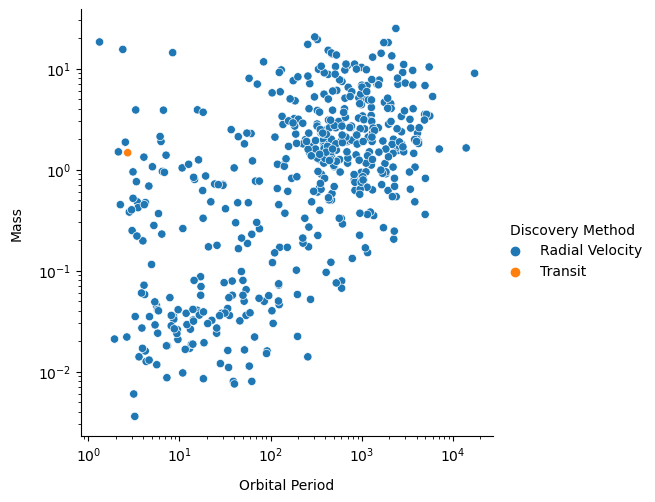

In [78]:
planets_clean = planets.dropna()

scatter_plot = sns.relplot(
    data = planets_clean,
    x = 'orbital_period', y = 'mass', hue = 
'method'

)

scatter_plot.set_axis_labels("Orbital Period", "Mass", labelpad=10)
scatter_plot.legend.set_title("Discovery Method")
plt.xscale('log')
plt.yscale('log')


<function matplotlib.pyplot.show(close=None, block=None)>

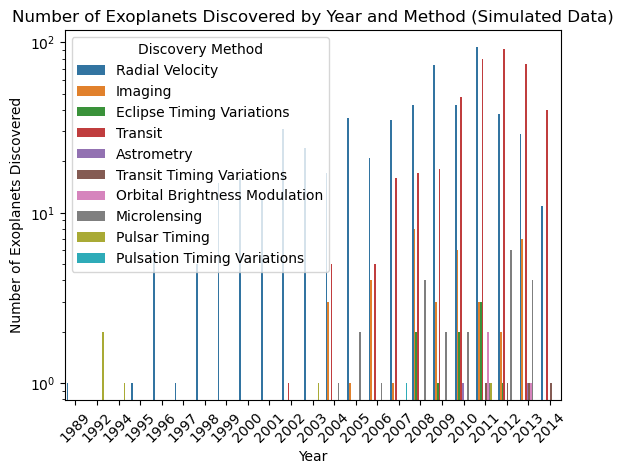

In [87]:
df_two = planets.dropna(subset = ['year', 'method'])
sns.countplot(data = df_two, x = 'year', hue = 'method')

plt.yscale('log')

plt.title('Number of Exoplanets Discovered by Year and Method (Simulated Data)')
plt.xlabel('Year')
plt.ylabel('Number of Exoplanets Discovered')
plt.xticks(rotation=45)
plt.legend(title='Discovery Method')

plt.show

<Figure size 1500x800 with 0 Axes>

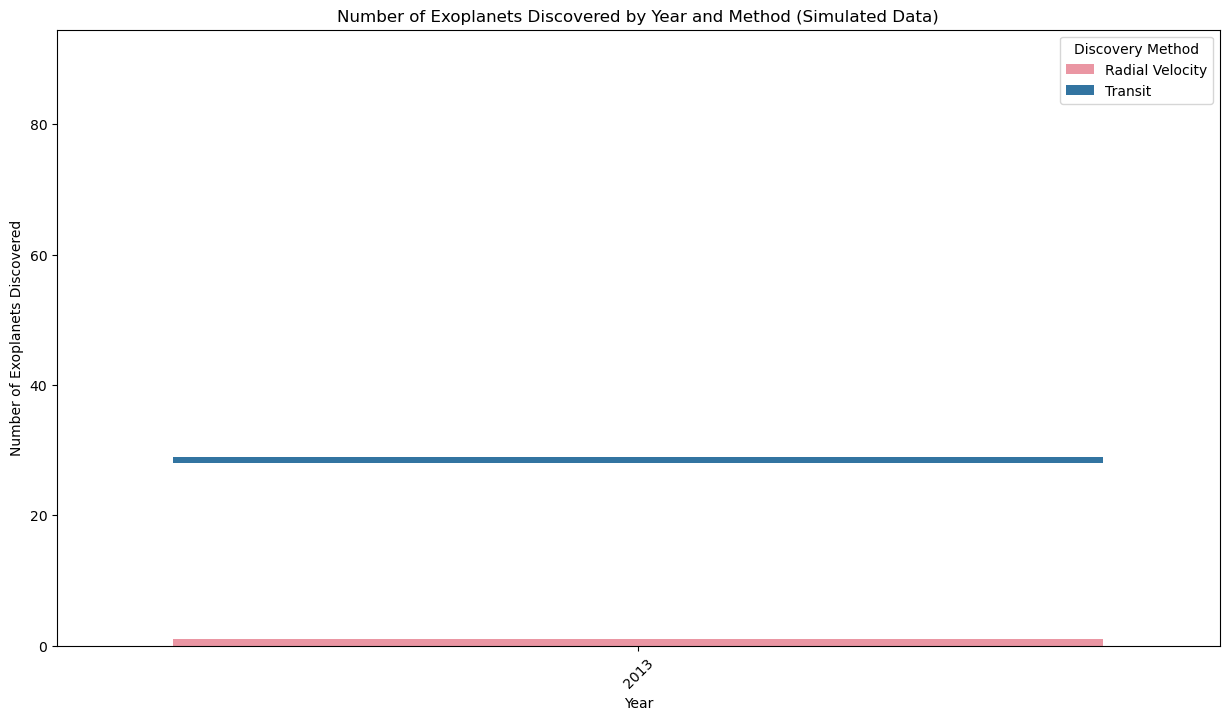

In [90]:
#Stacked barplot attempt: Unsuccessful

discovery_counts = planets_clean.groupby(['year', 'method']).size().reset_index(name='counts')

plt.figure(figsize=(15, 8))

yearly_totals = {year: 0 for year in discovery_counts['year'].unique()}

plt.figure(figsize=(15, 8))

for method in discovery_counts['method'].unique():
    method_data = discovery_counts[discovery_counts['method'] == method]
    sns.barplot(data=method_data, x='year', y='counts', bottom=[yearly_totals[year] for year in method_data['year']], label=method)

    for i, row in method_data.iterrows():
        yearly_totals[row['year']] += row['counts']

plt.title('Number of Exoplanets Discovered by Year and Method (Simulated Data)')
plt.xlabel('Year')
plt.ylabel('Number of Exoplanets Discovered')
plt.xticks(rotation=45)
plt.legend(title='Discovery Method')

plt.show()
